In [ ]:
# Instalação das bibliotecas necessárias para a resolução do case

# !pip install -U scikit-learn==0.23.2
# !pip install pandas-profiling==2.7.1 
# !pip install feature-engine==1.0.2
# !pip install scikit-optimize

In [2]:
import pandas as pd
# from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Importar base
df_raw = pd.read_csv(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Modelos Supervisionados\Classificação\Case\Telco-Customer-Churn.csv")

### Data analysis

In [5]:
df = df_raw.copy()
df.head()
# customerID:Customer ID
# gender:# Whether the customer is a male or a female
# SeniorCitizen:# Whether the customer is a senior citizen or not (1, 0)
# Partner: Whether the customer has a partner or not (Yes, No)
# Dependents: Whether the customer has dependents or not (Yes, No)
# tenure: Number of months the customer has stayed with the company
# PhoneService: Whether the customer has a phone service or not (Yes, No)
# MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
# InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
# OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
# OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
# DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
# TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
# StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
# StreamingMovies:Whether the customer has streaming movies or not (Yes, No, No internet service)
# Contract: The contract term of the customer (Month-to-month, One year, Two year)
# PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
# PaymentMethod:The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
# MonthlyCharges: The amount charged to the customer monthly
# TotalCharges: The total amount charged to the customer
# Churn:Whether the customer churned or not (Yes or No)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# # Rápida visão de dados através do relatório do pandas profile
# profile = ProfileReport(df, minimal=True)
# profile

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Algumas observações:

# Coluna CustomerID pode ser deletada da base porque não agrega informação para modelagem
# Colunas numéricas: Tenure, MonthlyCharges e TotalCharges
# Coluna TotalCharges possue valores em branco
# Colunas binárias: gender, SeniorCitizen, Partner, Dependents, OnlineSecurity, 
#                   OnlineBackup,	DeviceProtection, TechSupport,	StreamingTV, 
#                   StreamingMovies e Churn
# Coluna binária SeniorCitizen possue 0 e 1, diferente das demais colunas binárias 
#        que são preenchidas com Yes ou No
# Coluna binária gender possue Female e Male, diferente das demais colunas binárias 
#         que são preenchidas com Yes ou No
# Colunas categóricas (em formato de string): MultipleLines, InternetService, Contract, PaymentMethod
# Em geral o dataset não possui muitos valores nulos
# Variável target: Churn - não balanceada 


### Feature engineering

In [ ]:
# Transformando colunas numéricas em float

df["tenure"] = df["tenure"].astype(float)
df["MonthlyCharges"] = df["MonthlyCharges"].astype(float)
df['TotalCharges'].replace(to_replace=' ', value=np.nan, inplace=True)
df.dropna(inplace=True)
df["TotalCharges"] = df["TotalCharges"].astype(float)

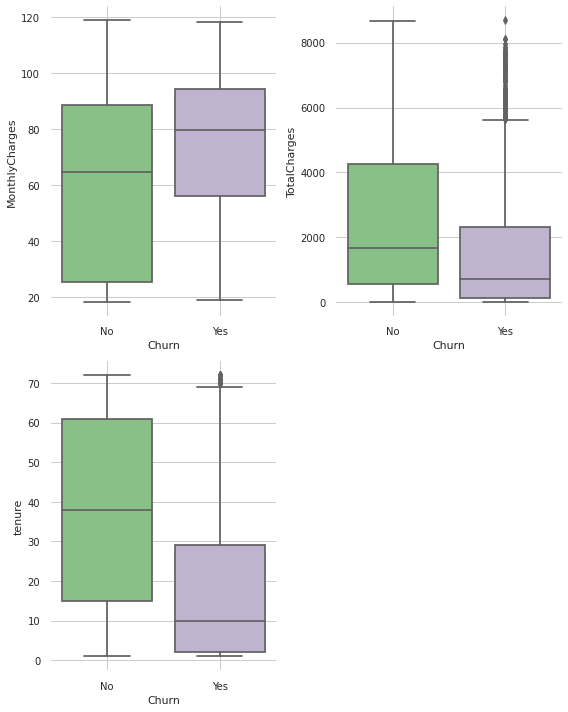

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(data=df, y="MonthlyCharges", x="Churn", palette="Accent")
plt.grid(True)
plt.subplot(2,2,2)
sns.boxplot(data=df, y="TotalCharges", x="Churn", palette="Accent")
plt.grid(True)
plt.subplot(2,2,3)
sns.boxplot(data=df, y = "tenure", x="Churn", palette="Accent")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Excluindo variáveis não úteis

df = df.drop(columns=["customerID"])

In [ ]:
#Transformando variáveis binárias

cols = ["Churn","Partner","Dependents","PhoneService", "Contract",	"PaperlessBilling"]
df[cols] = df[cols].replace({"Yes": 1, "No": 0})


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
#Separando preditores e target 

X = df.drop(columns=["Churn"])
Y = df[["Churn"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=10)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (5977, 19)
y_train (5977, 1)
X_test (1055, 19)
y_test (1055, 1)


In [ ]:
from feature_engine.encoding import OneHotEncoder
to_encode = ["PaymentMethod", "Contract", "InternetService","OnlineBackup",	"OnlineSecurity", "StreamingMovies", "DeviceProtection",	"TechSupport",	"StreamingTV", "MultipleLines", "gender"]

# Configuração do encoder
encoder = OneHotEncoder(variables=to_encode, drop_last=False)

# fit tdo encoder
encoder.fit(X_train)

# transformando os dados
X_train= encoder.transform(X_train)
X_test= encoder.transform(X_test)



In [ ]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic),Contract_Month-to-month,Contract_Two year,Contract_One year,InternetService_Fiber optic,InternetService_No,InternetService_DSL,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_Yes,StreamingMovies_No internet service,StreamingMovies_No,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,MultipleLines_Yes,MultipleLines_No,MultipleLines_No phone service,gender_Male,gender_Female
5383,0,0,0,36.0,1,1,84.75,3050.15,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
5828,0,1,1,72.0,1,0,24.45,1709.10,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
2319,0,1,1,11.0,1,0,90.60,1020.20,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
6185,0,1,0,50.0,1,1,103.95,5231.30,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0
3215,0,1,0,41.0,1,1,80.25,3439.00,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
# Normalização das variáveis

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformand para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)




In [ ]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic),Contract_Month-to-month,Contract_Two year,Contract_One year,InternetService_Fiber optic,InternetService_No,InternetService_DSL,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_Yes,StreamingMovies_No internet service,StreamingMovies_No,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,MultipleLines_Yes,MultipleLines_No,MultipleLines_No phone service,gender_Male,gender_Female
0,0.0,0.0,0.0,0.492958,1.0,1.0,0.662351,0.349798,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,1.000000,1.0,0.0,0.061753,0.195050,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.140845,1.0,0.0,0.720618,0.115555,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.690141,1.0,1.0,0.853586,0.601489,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.563380,1.0,1.0,0.617530,0.394669,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Classifier

### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {
          "C":(0.01, 1, 10, 100), 
          "penalty":("l1","l2")
}


In [ ]:
from sklearn.linear_model import  LogisticRegression
# Create a based model
clf = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=params_grid, n_jobs=-1, cv=3, verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (0.01, 1, 10, 100), 'penalty': ('l1', 'l2')})

In [ ]:
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_

{'C': 100, 'penalty': 'l2'}


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

y_pred = best_rf.predict(X_test)


f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas = {}
metricas["LogisticRegression"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }


F1 Score: 76.13%
Accuracy Score: 82.18%
Precision Score: 67.74%
Recall Score: 60.87%


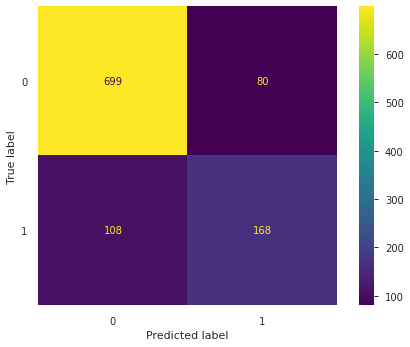

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  


plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

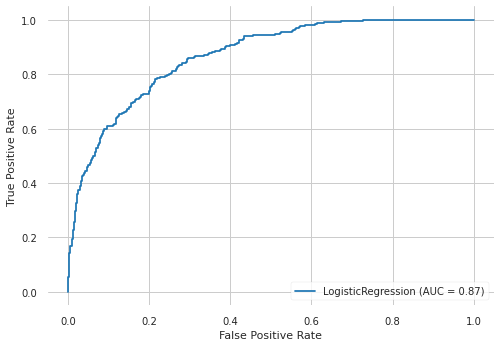

In [ ]:
from sklearn.metrics import plot_roc_curve

# Curva ROC
plot_roc_curve(best_rf, X_test, y_test)  
plt.grid()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_grid = {
    'max_depth': [100, 150],
    'max_features': [3, 4, 5],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 3, 8, 10],
    'n_estimators': [200,300,400]
}

In [ ]:
from skopt import BayesSearchCV

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
bayes_search = BayesSearchCV(estimator=clf, search_spaces=params_grid, n_jobs=-1, cv=3, verbose=0)

# # Fit the grid search to the data
bayes_search.fit(X_train, y_train)


BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': [100, 150], 'max_features': [3, 4, 5],
                             'min_samples_leaf': [1, 2, 3],
                             'min_samples_split': [2, 3, 8, 10],
                             'n_estimators': [200, 300, 400]})

In [ ]:
print(bayes_search.best_params_)
best_rf = bayes_search.best_estimator_

OrderedDict([('criterion', 'entropy'), ('max_depth', 100), ('max_features', 5), ('min_samples_leaf', 3), ('min_samples_split', 10), ('n_estimators', 200)])


In [ ]:
y_pred = best_rf.predict(X_test)

f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas["RandomForest"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
}




F1 Score: 76.14%
Accuracy Score: 82.37%
Precision Score: 68.75%
Recall Score: 59.78%


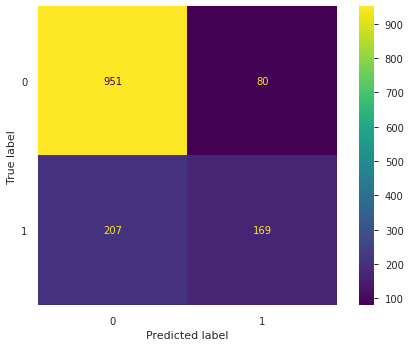

In [ ]:
# Matriz de confusão

plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

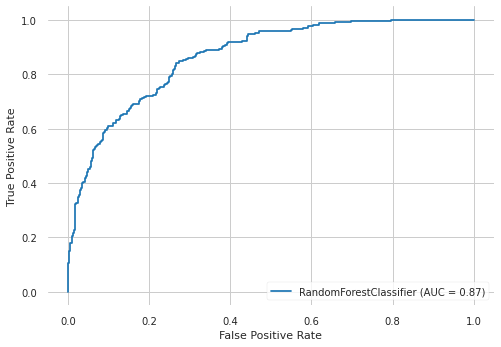

In [ ]:
# Curva ROC
plot_roc_curve(best_rf, X_test, y_test)  
plt.grid()
plt.show()

### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {
              'kernel': ['linear','poly','rbf'], 
}


In [ ]:
from sklearn.svm import SVC
clf = SVC()

# Instantiate the grid search model
bayes_search = BayesSearchCV(estimator=clf, search_spaces=params_grid, n_jobs=-1,  verbose=0)

# Fit the grid search to the data
bayes_search.fit(X_train, y_train)
#clf.fit(X_train, y_train)

BayesSearchCV(estimator=SVC(), n_jobs=-1,
              search_spaces={'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
print(bayes_search.best_params_)
best_svm = bayes_search.best_estimator_

OrderedDict([('kernel', 'linear')])


In [ ]:
y_pred = best_svm.predict(X_test)

f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas["SVM"]={
                "accuracy":accuracy,
                "precision":precision,
                "recall":recall,
                "f1":f1
}



F1 Score: 74.98%
Accuracy Score: 81.61%
Precision Score: 67.37%
Recall Score: 57.61%


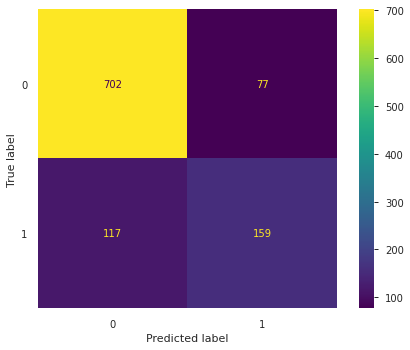

In [ ]:
#Matriz de confusão

plot_confusion_matrix(best_svm, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

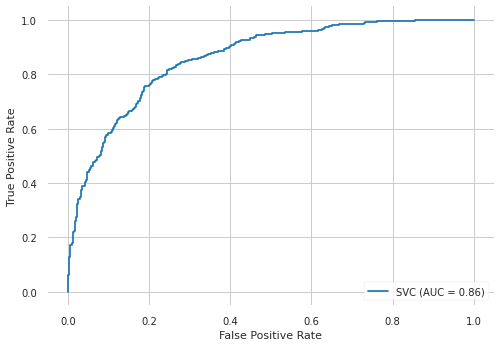

In [ ]:
#Curva ROC

plot_roc_curve(best_svm, X_test, y_test)  
plt.grid()
plt.show()

### Resumo classificadores

In [ ]:
resumo = pd.DataFrame.from_dict(metricas, orient='index')

NameError: ignored

In [ ]:
resumo